# 데이터 분석을 위한 전처리와 시각화 with 파이썬

# 10장. 병원 노쇼 환자 데이터 분석

## 학습 목표

* 캐글에서 제공하는 예약환자 데이터 셋을 활용하여 정형 데이터를 전처리한다.
* 전처리된 데이터를 이용하여 병원 노쇼 환자 데이터를 다양한 방법으로 시각화하고 분석한다.

## 1. 데이터 전처리의 이해
* 데이터 전처리에 대한 설명과 실습은 앞장에서 이미 학습했기 때문에 내용 생략

## 2. 병원 노쇼 환자 데이터 분석 실습 (1)
* 정형 데이터의 전처리 방법을 학습하기 위해 캐글에서 제공하는 예약환자 데이터 셋을 활용

### 2.1 문제 정의와 변수 설명
* A 병원에서는 예약한 환자들이 오지 않아 진료가 원활히 이루어지지 않는 일이 발생
* 예약하고 오지 않는 환자들의 특징을 파악
* 'No Show' 발생률을 줄일 수 있는 아이디어를 제시
* 제공된 데이터 셋 : **총 9개의 변수**로 구성
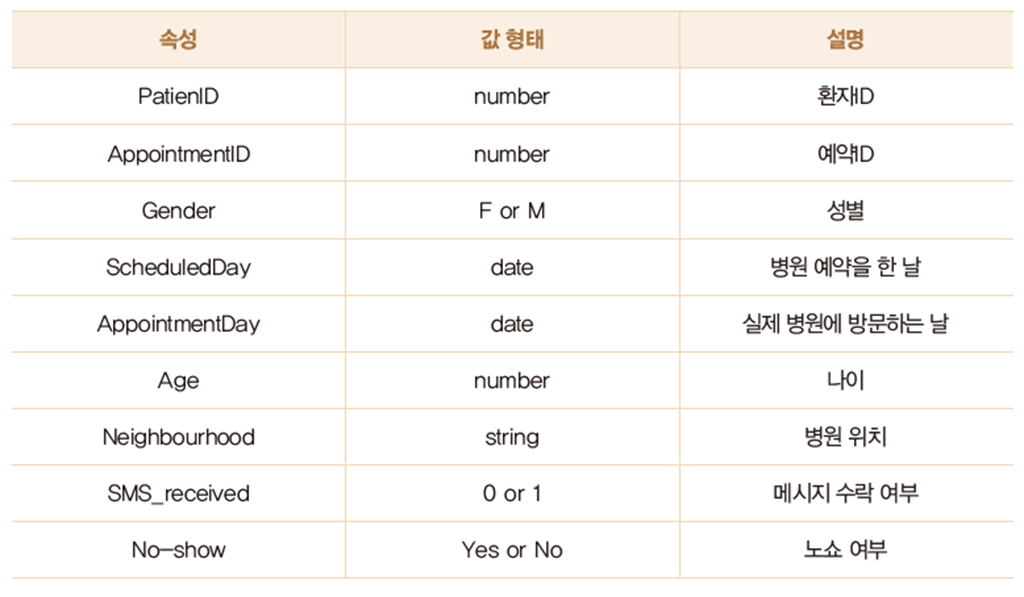

### 2.2 데이터 읽기와 확인

#### 실습 코드 10-10. 데이터 읽기

In [4]:
# 사용할 라이브러리 모듈 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


#### 실습 코드 10-11. 데이터의 컬럼명 확인

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

#### 실습 코드 10-12. 전반적인 정보 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


### 2.3 결측치 확인

#### 실습 코드 10-13. 결측치 유무 확인 (axis = 1)
* 행별 열방향 중 하나라도 NaN이 있는지 조사

In [11]:
df.isnull().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

#### 실습 코드 10-14. 결측치 유무 확인 (axis = 0)
* 각 컬럼별 행방향 중 하나라도 NaN이 있는지 조사

In [13]:
df.isnull().any(axis = 0)

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool

#### 각 열의 결측치 개수 합산 확인
* 데이터프레임 df에는 결측치(NaN) 값이 없는 것을 확인

In [15]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

### 2.4 통계량을 이용하여 이상치 제거

#### 실습 코드 10-15. 통계량 확인

In [17]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


#### 실습 코드 10-16. 이상치 제거
* df.describe() 함수를 실행한 결과 'Age' 열의 최소값(min)이 -1이 출력됨 → **이상치 발견**
* 나이를 0보다 크거나 같은 값으로만 추출하여 이상치 제거

In [19]:
df = df[df.Age >= 0]
df.Age.min()

0

### 2.5 데이터 타입 변환

### [수치형]
* 데이터 분석은 머신러닝을 이용하여 성능이 좋은 모델을 만드는 단계까지 진행하는 경우가 많음
* 머신러닝에서는 주로 수치형 데이터를 사용하기 때문에 **문자열 데이터를 수치형 데이터로 변환** 필요

#### 실습 코드 10-17. 수치형 데이터 변환
* 'No-show' 변수의 값 : 'Yes' 또는 'No'
  - **map() 함수를 사용하여 'Yes'는 1, 'No'는 0으로 변환**

In [21]:
df['No-show'] = df['No-show'].map({'Yes' : 1, 'No' : 0})

* map() 함수로 변환 결과 0, 1 이외의 값이 있는지 value_counts() 함수로 확인

In [23]:
df['No-show'].value_counts()

No-show
0    88207
1    22319
Name: count, dtype: int64

### [datetime 형으로 변환]
* 문자열 타입으로 표현된 ScheduledDay, AppointmentDay는 **datetime 타입으로 변환** → 시간 차이, 요일 수 등의 계산 가능
  - pd.to_datetime() 함수를 사용하여 변환

#### 실습 코드 10-18. datetime 형으로 변환

In [25]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


### 2.6 새로운 변수 추가
* 환자가 예약하고, 병원을 방문하는 기간이 어느 정도인지 파악하기 위해 **'waiting_day' 열 추가**
  - 'waiting_day' = 'AppointmentDay' - 'ShceduledDay'
  - 일수 차이를 구하기 위해 datetime 라이브러리에서 제공하는 **dayofyear 속성 사용**

#### 실습 코드 10-19. 새로운 컬럼 추가

In [27]:
df['waiting_day'] = df['AppointmentDay'].dt.dayofyear - df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waiting_day     110526 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(4), object(2)
memory usage: 8.9+ MB


#### 실습 코드 10-20. 새로운 컬럼의 이상치 확인

In [29]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.321029,0.201934,9.979046
std,2.560937e+14,7.129544e+04,23.110026,0.466874,0.401445,15.607516
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


#### 실습 코드 10-21. 새로운 컬럼의 이상치 제거
* 'waiting_day'에서 최소값이 -223이 출력
  - 'waiting_day'가 0과 같거나 큰 값만 추출하여 이상치 제거

In [31]:
df = df[df.waiting_day >= 0]
df['waiting_day'].min()

0

### 2.7 값 확인하여 이상치 제거
* 각 컬럼명에 표시된 값에 오류가 없는지 다시 한번 확인

### [Age]
* df.unique() 함수를 사용하여 나이 값에 이상이 없는지 확인

#### 실습 코드 10-22. 'Age' 값 확인

In [33]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

#### 실습 코드 10-23. 'Age' 이상치 확인
* df.unique() 함수를 통하여 출력된 나이값의 분포를 한 눈에 파악하기 힘듦
  - **상자 그래프(boxplot)를 통하여 이상치 파악**

<Axes: xlabel='Age'>

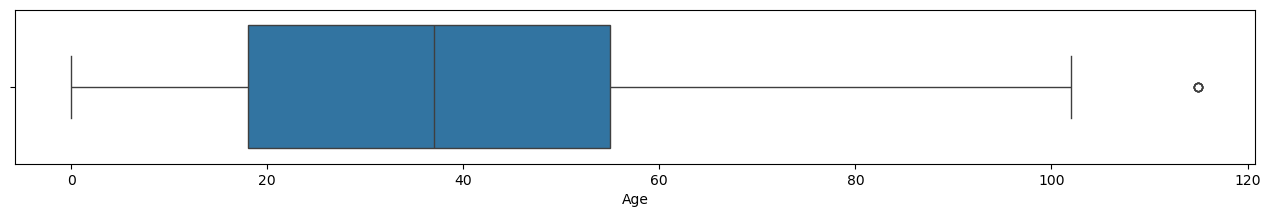

In [35]:
plt.figure(figsize = (16, 2))
sns.boxplot(x = df.Age)

#### 실습 코드 10-24. 'Age' 이상치 제거
* 상자 그래프의 출력 결과 120 근처에서 이상치가 있음을 알 수 있음
  - **Age가 110보다 적거나 같은 범위만 추출하여 이상치를 제거**

<Axes: xlabel='Age'>

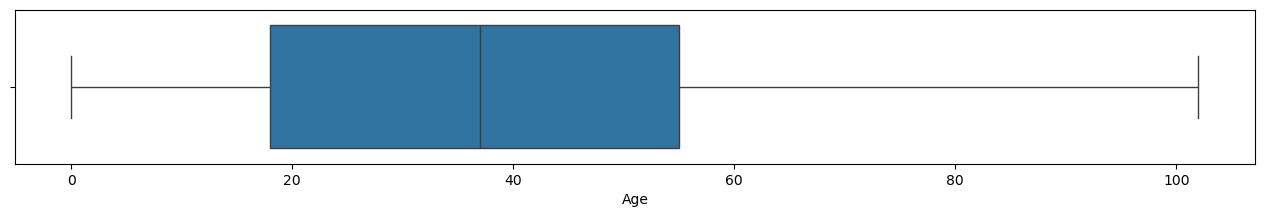

In [37]:
df = df[df.Age <= 110]
plt.figure(figsize = (16, 2))
sns.boxplot(x = df.Age)

### 2.8 목적에 적합한 변수 추출
* 이번 장의 데이터 분석 목적 : 병원 노쇼 환자 줄이는 것
  - **어떤 변수가 노쇼와 관련이 있는지 파악 필요**

### [waiting_day와 'No-show']
* 예약하고 방문을 기다리는 기간(waiting_day)과 노쇼하는 것(No-show) 간의 상관관계 파악

#### **wating_day == 0 : 진료 당일 예약 노쇼 비율**
* 당일 예약한 환자가 병원에 방문하지 않는 비율 계산
  - 당일 예약 환자가 병원에 방문하지 않는 건수 / 당일 예약 건수

#### 실습 코드 10-25. 당일 예약 건수 중 노쇼 비율
* 약 4.6% 정도 노쇼 발생

In [39]:
# 당일 방문으로 예약한 건수를 계산하고 a 변수에 저장
a = df[df.waiting_day == 0]['waiting_day'].value_counts()
# 당일 방문으로 예약하고 병원을 방문하지 않은('No-show') 환자의 건수를 계산하고 b 변수에 저장
b = df[(df['waiting_day'] == 0) & (df['No-show'] == 1)]['waiting_day'].value_counts()

# 당일 예악 건수 중 노쇼 비율 계산
b / a

waiting_day
0    0.046472
Name: count, dtype: float64

#### **waiting_day <= 10 : 대기 일자 10일까지 일자별 노쇼 비율 비교**
* 예약한 시점부터 병원 방문 날까지 **기다리는 날에 따라 노쇼와 노쇼가 아닌 비율**의 차이 비교

#### 실습 코드 10-26. 데이터 분할

In [41]:
no_show = df[df['No-show'] == 1]
show = df[df['No-show'] == 0]

#### 실습 코드 10-27. 데이터 분할 결과 히스토그램 시각화
* waiting_day가 10일 이내인 각 날짜별 노쇼와 노쇼가 아닌 횟수를 히스토그램으로 표시
  - 예약 건수가 가장 많은 당일 예약에서 노쇼가 다른 기간의 노쇼 건수와 비슷한 수치를 유지
  - **당일 예약의 경우 노쇼가 거의 발생하지 않음을 확인**

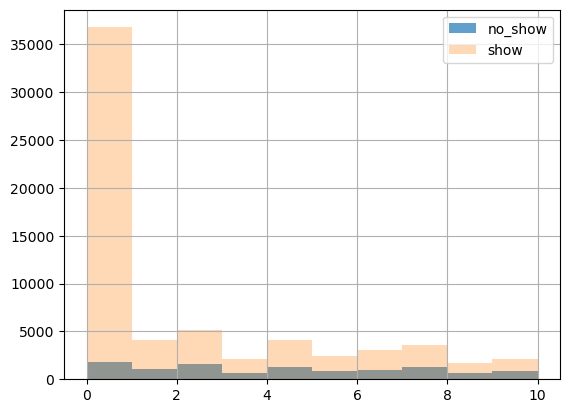

In [43]:
# waiting_day가 10보다 작은 값에 대한 No-show 데이터만 추출하여 no_show_10 변수에 저장 
no_show_10 = no_show[no_show['waiting_day'] <= 10]['waiting_day'];
# waiting_day가 10보다 작은 값에 대한 Show 데이터만 추출하여 show_10 변수에 저장
show_10 = show[show['waiting_day'] <= 10]['waiting_day']

# no_show_10, show_10의 날짜별 빈도를 히스토그램으로 시각화
no_show_10.hist(alpha = 0.7, label = 'no_show')
show_10.hist(alpha = 0.3, label = 'show')

plt.legend()

### [ScheduledDay / AppointmentDay와 'No-show']

#### **ScheduledDay와 'No-show'**
* **예약 잡은 날에 따른** 노쇼 건수와 노쇼가 아닌 건수를 비교

#### 실습 코드 10-28. 시각화로 ScheduledDay와 'No-show' 파악
* 2016년 5월 초 ~ 5월 말 사이에 가장 많은 예약 발생
* 예약 잡은 날에 실제 병원에 방문하지 않는 노쇼 건수는 2016년 4월 말과 5월 초반에 예약을 가장 많이 함

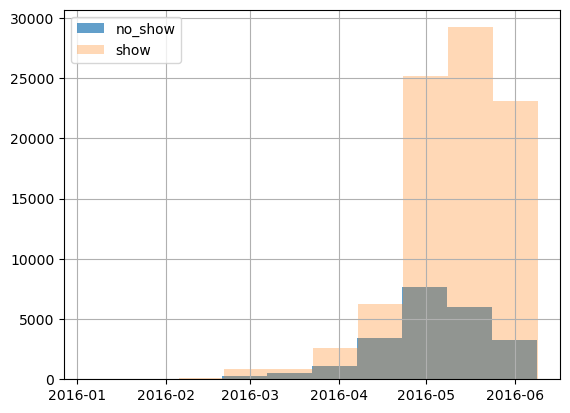

In [45]:
no_show['ScheduledDay'].hist(alpha = 0.7, label = 'no_show')
show['ScheduledDay'].hist(alpha = 0.3, label = 'show')
plt.legend()

#### **AppointmentDay와 'No-show'***
* **병원 방문일에 따른** 노쇼가 발생한 건수와 그렇지 않은 건수를 비교

#### 실습 코드 10-29. 시각화로 AppointmentDay와 'No-show' 파악
* 별다른 특이점 없음
* 병원 방문이 가장 많은 날 : 2016년 6월 1일 ~ 3일

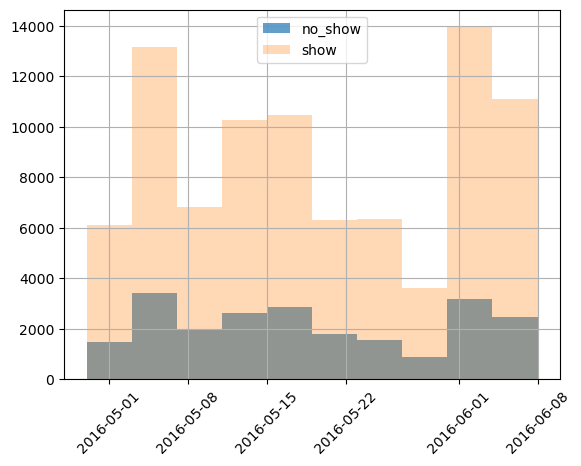

In [47]:
no_show['AppointmentDay'].hist(alpha = 0.7, label = 'no_show')
show['AppointmentDay'].hist(alpha = 0.3, label = 'show')

plt.xticks(rotation = 45)
plt.legend()

### [재방문 환자와 'No-show']
* 재방문하는 환자가 예약 잡은 날 병원에 오는 건수와 그렇지 않은 건수 비교

#### **환자의 병원 예약 횟수**
* 환자별 예약 횟수 : **PatientId별로 value_count() 함수의 값을 계산**하여 추출할 수 있음

#### 실습 코드 10-30. 상위 10명 환자의 방문 횟수 확인하기
* 환자의 수가 많으므로 예약 횟수 상위 10개만 먼저 확인
  - 예약 횟수가 가장 많은 경우는 141회

In [49]:
df.PatientId.value_counts().iloc[0:10]

PatientId
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: count, dtype: int64

#### 실습 코드 10-31. 상위 500명 환자의 예약 횟수 분포
* 상위 500개의 예약 횟수의 분포 확인하기 위해 히스토그램으로 시각화
  - 50 ~ 60번 사이의 예약을 가장 많이 한 것으로 확인됨

<Axes: >

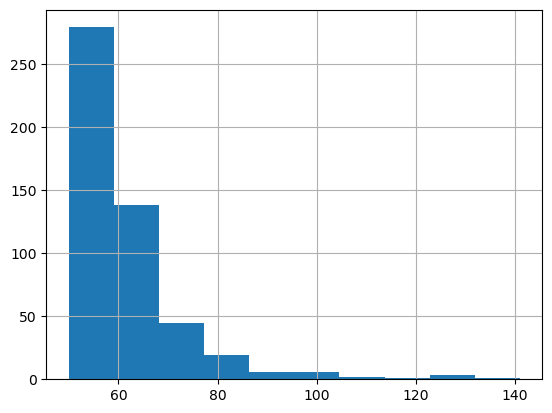

In [51]:
df.PatientId.value_counts().iloc[0:500].hist()

#### 실습 코드 10-32. 상위 500명 환자의 예약 횟수
* 최소 50회 ~ 최대 141회 예약이 발생됨

In [53]:
df.PatientId.value_counts().iloc[0:500]

PatientId
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
4.170000e+14     50
9.590000e+14     50
7.220000e+13     50
2.730000e+12     50
3.690000e+13     50
Name: count, Length: 500, dtype: int64

#### **'PatientId'와 'waiting_day'**
* 환자별로 기다리는 기간에 따른 노쇼 발생 건수 확인

#### 실습 코드 10-33. 'PatientId'와 'waiting_day' 파악
* 'waiting_day'를 50일 이상으로 설정하고 PatientId의 value_count() 함수로 확인
  - 예약하고 병원에 방문하기까지 **기다리는 기간이 길수록 여러 건의 노쇼가 발생**되고 있음을 알 수 있음

In [55]:
df[(df['waiting_day'] >= 50) & (df['No-show'] == 1)].PatientId.value_counts().iloc[0:10]

PatientId
3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
5.670000e+12    3
2.590000e+13    3
9.630000e+14    3
4.970000e+12    3
9.460000e+14    3
3.370000e+13    3
Name: count, dtype: int64

### [SMS_received와 wating_day, 'No-show']
* 알림 메시지 허용 여부와 기다리는 기간의 노쇼 상관관계 파악

#### 실습 코드 10-34. SMS_received, waiting_day와 'No-show' 특성 파악
* barplot() 함수를 사용하여 알림 메시지 허용 여부에 따른 노쇼 발생 특성 파악
  - **알림 메시지를 허용하지 않은 경우** : 기다리는 기간이 5일 이상이면 노쇼가 발생
  - **알림 메시지를 허용하는 경우** : 기다리는 기간이 18일 이상이면 노쇼가 발생

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

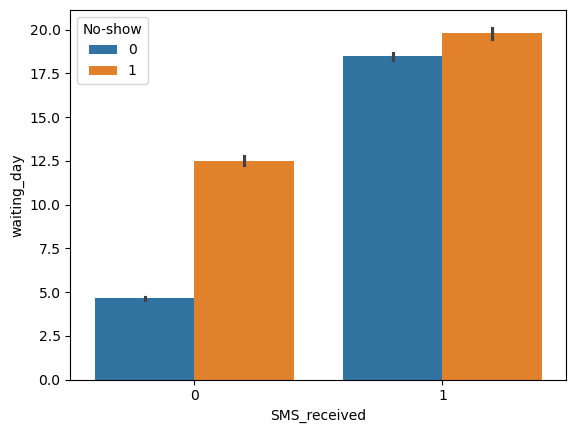

In [57]:
sns.barplot(y = 'waiting_day', x = 'SMS_received', hue = 'No-show', data = df)

#### 실습 코드 10-35. SMS_received에 따른 'No-show' 비율 파악
* 알림 메시지를 허용하지 않았을 때 알림 메시지를 허용한 경우와 비교하여 노쇼 비율이 11% 정도 높음

In [59]:
a=len(df[(df['SMS_received'] == 0) & (df['No-show'] == 1)])
b=len(df[(df['SMS_received'] == 0) & (df['No-show'] == 0)])

print(f'SMS_received가 0일때 노쇼 : {a}')
print(f'SMS_received가 0일때 쇼 : {b}')
print(f'SMS_received가 0일때 노쇼비율 : {a / (a + b)}')

c=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
d=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 0)])

print(f'SMS_received가 1일때 노쇼 : {c}')
print(f'SMS_received가 1일때 쇼 : {d}')
print(f'SMS_received가 1일때 노쇼비율 : {c / (c + d)}')

SMS_received가 0일때 노쇼 : 12522
SMS_received가 0일때 쇼 : 62494
SMS_received가 0일때 노쇼비율 : 0.1669243894635811
SMS_received가 1일때 노쇼 : 9770
SMS_received가 1일때 쇼 : 25668
SMS_received가 1일때 노쇼비율 : 0.2756927591850556


### [상관관계로 확인]
* SMS_received, waiting_day와 'No-show' 간의 관계를 heatmap()을 이용하여 시각화
  
#### 실습코드 10-36. 'waiting_day'와 'SMS_received' 간의 상관관계 파악

<Axes: >

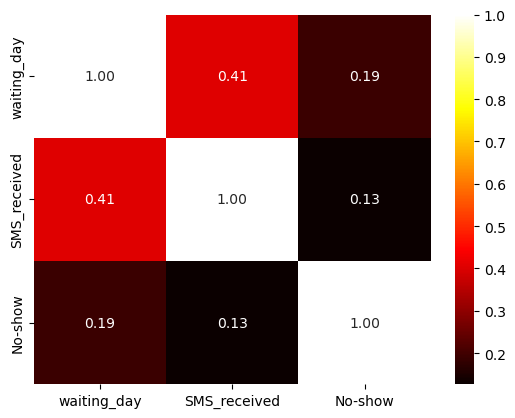

In [61]:
temp = df[['waiting_day', 'SMS_received', 'No-show']].corr()
sns.heatmap(temp, annot=True, fmt='.2f',cmap='hot')

### 2.9 노쇼의 특징 파악 정리
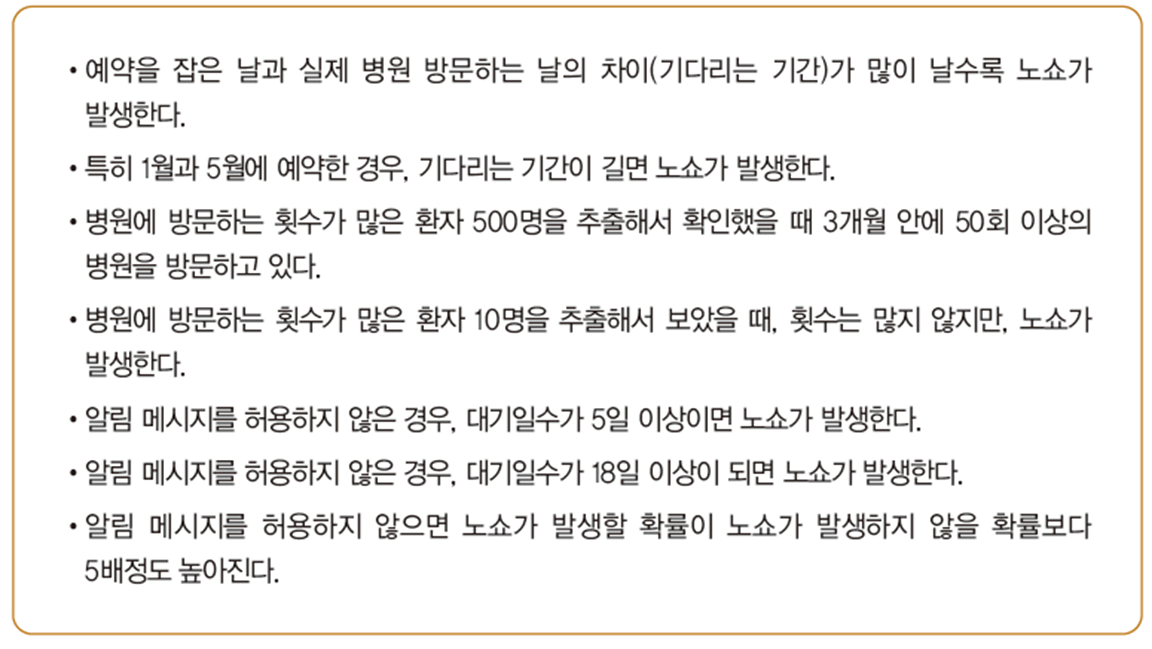

* 기다리는 기간이 길수록 노쇼 발생확률이 높음
* 알림 메시지를 허용하지 않으면 기다리는 기간(5일 이상)이 길어지는 많은 경우가 노쇼로 이어질 확률이 높음
* 짦은 기간에 여러 번 병원을 방문해야 하는 환자의 경우 노쇼가 가끔씩 발생

## 3. 병원 노쇼 환자 데이터 분석 실습 (2)

#### 실습 코드 10-37. 1. 얼마나 많은 환자가 예정된 약속에 오지 않았는가?
* countplot() 함수를 이용하여 No-show와 그렇지 않은 경우의 횟수 계산
  - 전체 예약 환자 중 20% 정도 노쇼 발생

<Axes: xlabel='No-show', ylabel='count'>

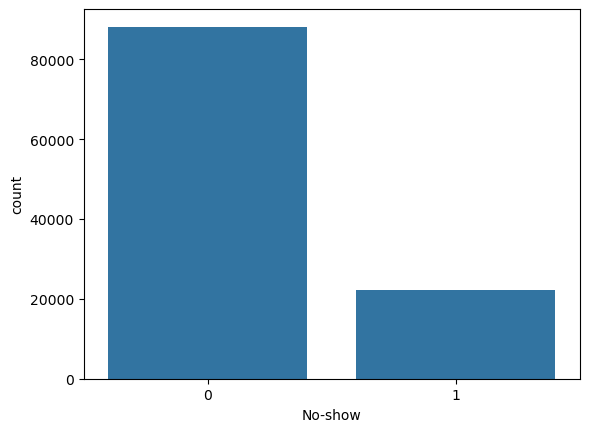

In [64]:
sns.countplot(x = 'No-show', data = df)

#### 실습 코드 10-38. 2. 성별에 따른 노쇼 여부 차이
* countplot() 함수를 사용하여 Gender별 No-show와 그렇지 않은 경우의 횟수 계산
  - 남성 예약환자보다 여성 예약환자가 차지하는 비율이 더 높음

<Axes: xlabel='Gender', ylabel='count'>

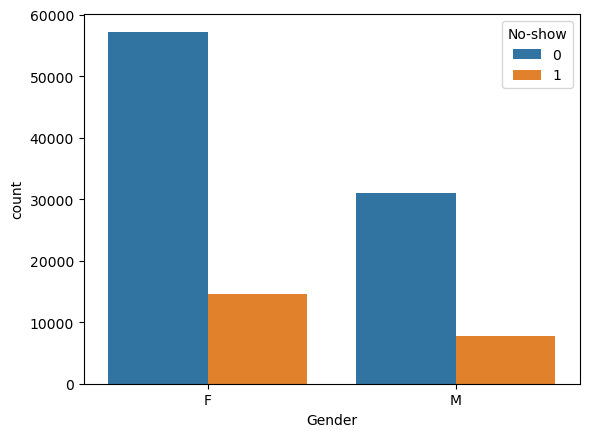

In [66]:
sns.countplot(x = 'Gender', hue = 'No-show', data = df)

#### 실습 코드 10-39. 3. 노쇼의 여성과 남성비율은?
* 여성의 경우 20% 정도 노쇼 발생, 남성의 경우 22% 정도 노쇼가 발생
  - **성별이 노쇼에 영향 받지 않음**

In [68]:
여성인원수 = df[(df['Gender'] == 'F') & (df['No-show'] == 1)]['Gender'].value_counts()
남성인원수 = df[(df['Gender'] == 'M') & (df['No-show'] == 1)]['Gender'].value_counts()

전체여성수 = df[df["Gender"] == 'F']['Gender'].value_counts()
전체남성수 = df[df["Gender"] == 'M']['Gender'].value_counts()

print(여성인원수 / 전체여성수)
print(남성인원수 / 전체남성수)

Gender
F    0.203062
Name: count, dtype: float64
Gender
M    0.199519
Name: count, dtype: float64
